In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside4of the current session

/kaggle/input/summeranalytics2020/Sample_submission.csv
/kaggle/input/summeranalytics2020/test.csv
/kaggle/input/summeranalytics2020/train.csv


In [2]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('../input/summeranalytics2020/train.csv')
df_test = pd.read_csv("../input/summeranalytics2020/test.csv")
df.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1


In [4]:
print(df['Attrition'].value_counts())
df['Behaviour'].value_counts()

0    843
1    785
Name: Attrition, dtype: int64


1    1628
Name: Behaviour, dtype: int64

In [5]:
df = df.drop_duplicates(subset = ["Age", "Attrition", "BusinessTravel", "Department", "DistanceFromHome", "Education", "EducationField", "EmployeeNumber", "EnvironmentSatisfaction", "Gender", "JobInvolvement", "JobRole", "JobSatisfaction", "MaritalStatus", "MonthlyIncome", "NumCompaniesWorked", "OverTime", "PercentSalaryHike", "PerformanceRating", "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager", "CommunicationSkill"])

In [6]:
# THE NEW SHAPE OF THE COLUMN
df.shape

(1000, 29)

In [7]:
# CHANGING CATEGORICAL DATA TO NUMERICAL DATA
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df['BusinessTravel'] = labelencoder.fit_transform(df['BusinessTravel'])
df['Department'] = labelencoder.fit_transform(df['Department'])
df['EducationField'] = labelencoder.fit_transform(df['EducationField'])
df['Gender'] = labelencoder.fit_transform(df['Gender'])
df['JobRole'] = labelencoder.fit_transform(df['JobRole'])
df['MaritalStatus'] = labelencoder.fit_transform(df['MaritalStatus'])
df['OverTime'] = labelencoder.fit_transform(df['OverTime'])

df_test['BusinessTravel'] = labelencoder.fit_transform(df_test['BusinessTravel'])
df_test['Department'] = labelencoder.fit_transform(df_test['Department'])
df_test['EducationField'] = labelencoder.fit_transform(df_test['EducationField'])
df_test['Gender'] = labelencoder.fit_transform(df_test['Gender'])
df_test['JobRole'] = labelencoder.fit_transform(df_test['JobRole'])
df_test['MaritalStatus'] = labelencoder.fit_transform(df_test['MaritalStatus'])
df_test['OverTime'] = labelencoder.fit_transform(df_test['OverTime'])

In [8]:
# DROPPING "Behaviour" COLUMN, CAUSE IT IS OF NO USE
df_test = df_test.drop(["Behaviour"], axis = 1)
df = df.drop(["Behaviour"], axis = 1)

In [9]:
# SEPARATING FEAURE AND TARGET COLUMN
X =  df.loc[:, df.columns != 'Attrition']
y = df.loc[:, df.columns == 'Attrition']

In [10]:
# NOW LET'S SCALE THE DATA
from sklearn.preprocessing import scale
X = scale(X)
df_test_final = scale(df_test)

****IMPLEMENTING EDA****

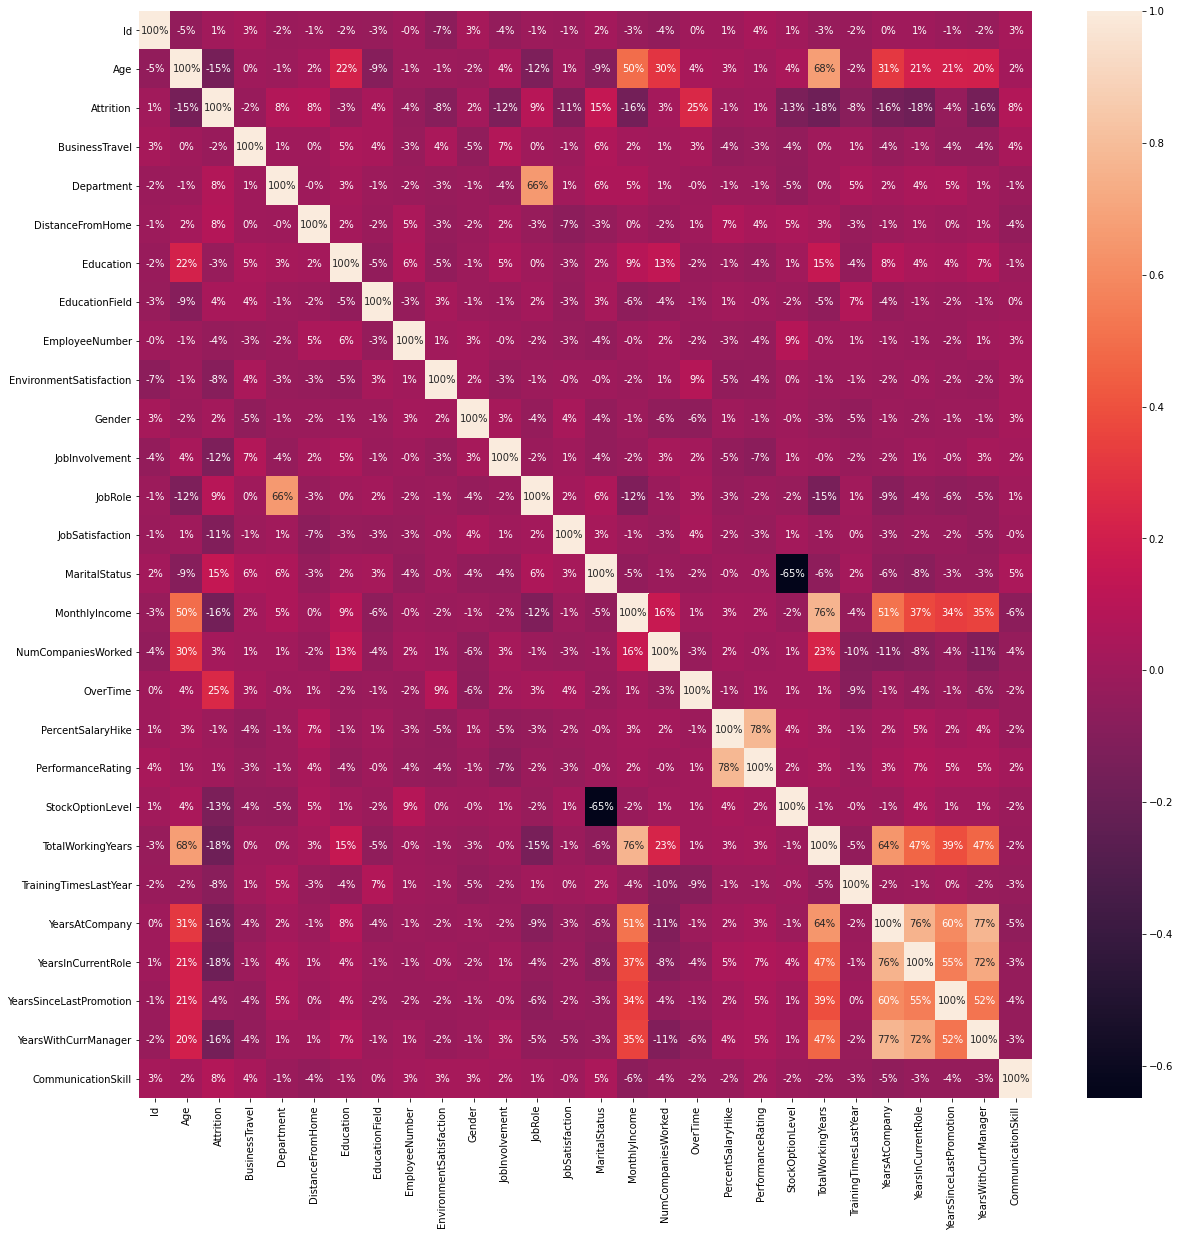

In [11]:
# WITH HEAT MAP WE CAN FIND RELATION SHIPS BETWEEN EACH COLUMNS
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f674438df50>,
      dtype=object)

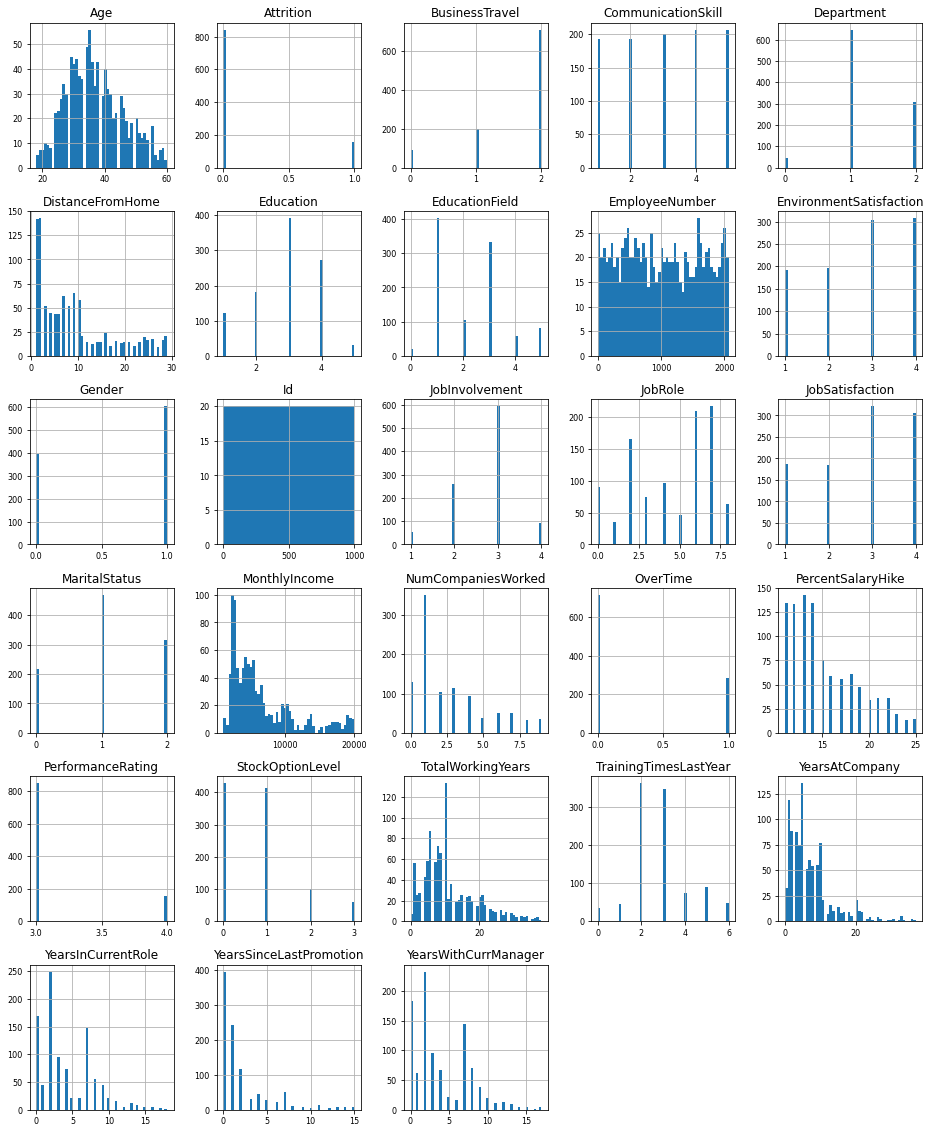

In [12]:
# LET'S HISTOGRAM FOR NUMERICAL DATA OF DATAFRAME
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)# ; avoid having the matplotlib verbose informations

In [13]:
# SPLITTING THE DATA
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state = 1)

In [14]:
# CHECKING THE SHAPE OF DATA
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)

(900, 27)
(900, 1)
(100, 27)


**[](http://)**MODEL FITTING: Here we will check 4 models individually and together, see which one is better and use that model.

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [16]:
# PREDICTING WITH LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs', max_iter=1000, C=0.5, penalty='l2', random_state=1)
logreg_train = LogisticRegression(solver='lbfgs', max_iter=1000, C=0.5, penalty='l2', random_state=1)
logreg_full = LogisticRegression(solver='lbfgs', max_iter=1000, C=0.5, penalty='l2', random_state=1)

logreg_full = logreg_full.fit(X, y)
logreg_train = logreg_train.fit(x_train, y_train)

y_pred_train = logreg_full.predict(x_train)
y_pred_val = logreg_train.predict_proba(x_val) 
y_pred_val = y_pred_val[:,1]

y_pred = logreg_full.predict_proba(df_test_final)
df_logreg_final = y_pred[:,1]

print("------logreg-------")
print("accuracy", accuracy_score(y_train, y_pred_train))
print("roc_auc", roc_auc_score(y_train, y_pred_train))
print("roc_auc", roc_auc_score(y_val, y_pred_val))

------logreg-------
accuracy 0.8788888888888889
roc_auc 0.6590819948149353
roc_auc 0.828125


In [17]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(loss = "deviance", learning_rate = 1, n_estimators = 5500, criterion = "friedman_mse")
gbc_train = GradientBoostingClassifier(loss = "deviance", learning_rate = 1, n_estimators = 5500, criterion = "friedman_mse")
gbc_full = GradientBoostingClassifier(loss = "deviance", learning_rate = 1, n_estimators = 5500, criterion = "friedman_mse")

gbc_train = gbc_train.fit(x_train, y_train) 
gbc_full = gbc_full.fit(X, y)

y_pred_train = gbc_full.predict(x_train)
y_pred_val = gbc_train.predict_proba(x_val) 
y_pred_val = y_pred_val[:, 1]

y_pred = gbc_full.predict_proba(df_test_final)
df_gbc_final = y_pred[:,1]

print("------gbc-------")
print("accuracy", accuracy_score(y_train, y_pred_train))
print("roc_auc", roc_auc_score(y_train, y_pred_train))
print("roc_auc", roc_auc_score(y_val, y_pred_val))

------gbc-------
accuracy 1.0
roc_auc 1.0
roc_auc 0.811875


In [18]:
from sklearn.svm import SVC

svc = SVC(C = 1, kernel = 'rbf',random_state = 42, probability = True)
svc_train = SVC(C = 1, kernel = 'rbf',random_state = 42, probability = True)
svc_full = SVC(C = 1, kernel = 'rbf',random_state = 42, probability = True)

svc_full = svc_full.fit(X, y)
svc_train = svc_train.fit(x_train, y_train)

y_pred_train = svc_full.predict(x_train) 

y_pred_val = svc_train.predict_proba(x_val) 
y_pred_val = y_pred_val[:,1]

y_pred = svc_full.predict_proba(df_test_final)
df_svc_final = y_pred[:,1]

print("accuracy of traing: ",accuracy_score(y_train, y_pred_train))
print("roc_auc of training: ", roc_auc_score(y_train, y_pred_train))
print("roc_auc of validation: ", roc_auc_score(y_val, y_pred_val))

accuracy of traing:  0.9066666666666666
roc_auc of training:  0.6964249839760454
roc_auc of validation:  0.8425


In [19]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(4,2,2), activation='relu', solver='adam', max_iter=1000, alpha = 0.0007, random_state = 56, learning_rate = "invscaling")
mlp_test = MLPClassifier(hidden_layer_sizes=(4,2,2), activation='relu', solver='adam', max_iter=1000, alpha = 0.0007, random_state = 56, learning_rate = "invscaling")
mlp_full = MLPClassifier(hidden_layer_sizes=(4,2,2), activation='relu', solver='adam', max_iter=1000, alpha = 0.0007, random_state = 56, learning_rate = "invscaling")

mlp_full = mlp_full.fit(X, y)
mlp_test = mlp_test.fit(x_train, y_train)

y_pred_train = mlp_full.predict(x_train) 

y_pred_val = mlp_test.predict_proba(x_val) 
y_pred_val = y_pred_val[:,1]

y_pred = mlp_full.predict_proba(df_test_final)
df_svc_final = y_pred[:,1]

print("accuracy of traing: ",accuracy_score(y_train, y_pred_train))
print("roc_auc of training: ", roc_auc_score(y_train, y_pred_train))
print("roc_auc of validation: ", roc_auc_score(y_val, y_pred_val))

accuracy of traing:  0.9155555555555556
roc_auc of training:  0.7885029321445313
roc_auc of validation:  0.7790625


In [20]:
from sklearn.ensemble import VotingClassifier 

estimator = [] 
estimator.append(('LR', logreg)) 
estimator.append(('SV', svc))
estimator.append(('MLP', mlp))
estimator.append(('NB', gbc))

vot_test = VotingClassifier(estimators = estimator, voting ='soft') 
vot_test = vot_test.fit(x_train, y_train) 
y_pred_test = vot_test.predict_proba(x_val) 

vot_full = VotingClassifier(estimators = estimator, voting ='soft') 
vot_full = vot_full.fit(X, y) 
y_pred = vot_test.predict(x_train) 

print("accuracy of traing: ",accuracy_score(y_train, y_pred))
print("roc_auc of training: ", roc_auc_score(y_train, y_pred))
print("roc_auc of validation: ", roc_auc_score(y_val, y_pred_test[:,1]))

accuracy of traing:  0.9522222222222222
roc_auc of training:  0.8490543475141346
roc_auc of validation:  0.825625


*AS WE CAN SEE VOTING CLASSIFIER WORKS BEST HERE*

In [21]:
y_vc_pred = vot_full.predict_proba(df_test_final)
y_vc_pred_final = y_vc_pred[:, 1]
print(len(y_vc_pred))

470


In [22]:
my_submission = pd.DataFrame({'Id': df_test.Id, 'Attrition': y_vc_pred_final})
my_submission.to_csv('submission.csv', index=False)